<a href="https://colab.research.google.com/github/pgdinamica/ftd2024/blob/main/infografico.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from PIL import Image, ImageFilter
import ipywidgets as widgets
from IPython.display import display
from ipywidgets import fixed

In [2]:
# download da imagem de uma tartaruga
# Fonte: https://unsplash.com/pt-br/fotografias/foto-subaquatica-da-tartaruga-marinha-bEmYpStxnrc
!wget https://raw.githubusercontent.com/pgdinamica/ftd2024/main/img/tartaruga.jpg

--2024-08-13 16:39:43--  https://raw.githubusercontent.com/pgdinamica/ftd2024/main/img/tartaruga.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 105582 (103K) [image/jpeg]
Saving to: ‘tartaruga.jpg.1’

tartaruga.jpg.1     100%[===================>] 103.11K  --.-KB/s    in 0.01s   

2024-08-13 16:39:43 (6.83 MB/s) - ‘tartaruga.jpg.1’ saved [105582/105582]



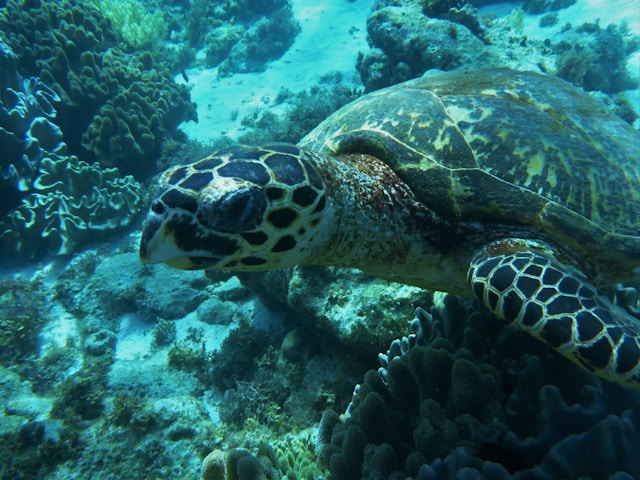

In [3]:
img = Image.open("tartaruga.jpg")
img

# Código Python das funções utilizadas

In [4]:
def borrar(imagem, intensidade):
    """Aplica um borramento gaussiano a uma imagem"""
    blurred_image = imagem.filter(
        ImageFilter.GaussianBlur(radius=intensidade))
    display(blurred_image)

# Cria uma barra interativa para ajustar a intensidade
slider = widgets.IntSlider(
    value=1,        # Initial radius
    min=0,          # Minimum value of the radius
    max=10,         # Maximum value of the radius
    step=1,         # Step size for the slider
    description='Intensidade:',
    continuous_update=False  # Update in real-time as the slider moves
)

cache = None
def descolorir(imagem, intensidade):
  """Descolore uma imagem de acordo com o % de intensidade"""
  global cache
  if cache is None:
    cinza = imagem.convert('L').convert('RGB')
    cache = cinza
  else:
    cinza = cache
  blended = Image.blend(imagem,
                        cinza,
                        alpha=intensidade/100)
  display(blended)

# Cria uma barra interativa para ajustar a intensidade
percentual = widgets.IntSlider(
    value=50,        # Initial radius
    min=0,          # Minimum value of the radius
    max=100,         # Maximum value of the radius
    step=1,         # Step size for the slider
    description='Percentual:',
    continuous_update=False  # Update in real-time as the slider moves
)

# Filtrando uma imagem para produzir o efeito de borramento

* Um filtro de borramento é uma ferramenta usada em processamento de imagens para suavizar ou desfocar a imagem. Isso é feito reduzindo o contraste entre pixels adjacentes, criando um efeito de suavização.

* Uma forma de implementar este tipo de filtro é calcular a média dos valores dos pixels em uma área ao redor de cada pixel e usar essa média como o novo valor do pixel.

* Você pode ampliar o tamanho da janela ao redor do pixel que é levada em consideração no cálculo, aumentando a intensidade do borramento. Experimente ampliar e reduzir esta janela movendo a barra deslizante.

In [5]:
# Display the slider and link it to the blur function
widgets.interact(borrar, imagem=fixed(img), intensidade=slider)

interactive(children=(IntSlider(value=1, continuous_update=False, description='Intensidade:', max=10), Output(…

<function __main__.borrar(imagem, intensidade)>

# Descolorindo uma imagem de acordo com um % de intensidade

* Podemos descolorir uma imagem aos poucos usando uma composição entre a imagem original em cores e sua versão em escala de cinza. Esta é uma técnica interessante que permite ajustar o nível de descoloração conforme desejado.

* Experimente ajustar o nível de descolorização movendo a barra deslizante abaixo. O que você observa nos extremos?

In [6]:
widgets.interact(descolorir,
                 imagem=fixed(img), intensidade=percentual)

interactive(children=(IntSlider(value=50, continuous_update=False, description='Percentual:'), Output()), _dom…

<function __main__.descolorir(imagem, intensidade)>